# First data explorations 

## This is also necessary for ascertaining some model assumptions

In this notebook we analyse the consumption and other country data a bit more in detail to see what are its systematics
We answer questions like 

1. What is the ratio between GDP per capita and consumption exp. per capita?  
2. How does this ratio change with cons. exp pc?
3. Is there a relationship between GDP per capita and carbon intensity? 

and more..

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
# read the csv file data_nowcasted.extended.csv into a pandas dataframe from the data folder
data = pd.read_csv('./data/pip_all_data/data_nowcasted_extended.csv')


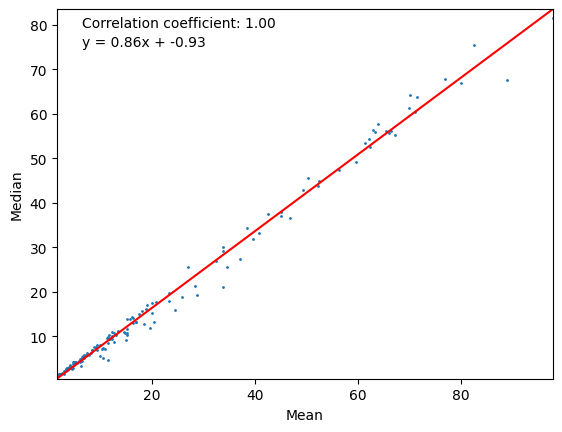

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for scatterplot and linear fit line
plt.scatter(data['mean'], data['median'], s=1)
plt.plot(np.unique(data['mean']), np.poly1d(np.polyfit(data['mean'], data['median'], 1))(np.unique(data['mean'])), color='red')
plt.xlabel('Mean')
plt.ylabel('Median')
plt.margins(0)

# Calculating correlation coefficient and linear fit equation
correlation_coef = np.corrcoef(data['mean'], data['median'])[0][1]
linear_fit_eq = np.poly1d(np.polyfit(data['mean'], data['median'], 1))

# Formatting annotations with two significant digits
formatted_correlation = f"{correlation_coef:.2f}"
formatted_linear_fit_eq = f"y = {linear_fit_eq.coefficients[0]:.2f}x + {linear_fit_eq.coefficients[1]:.2f}"

# Annotating the plot
plt.annotate(f'Correlation coefficient: {formatted_correlation}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(formatted_linear_fit_eq, xy=(0.05, 0.9), xycoords='axes fraction')

plt.show()


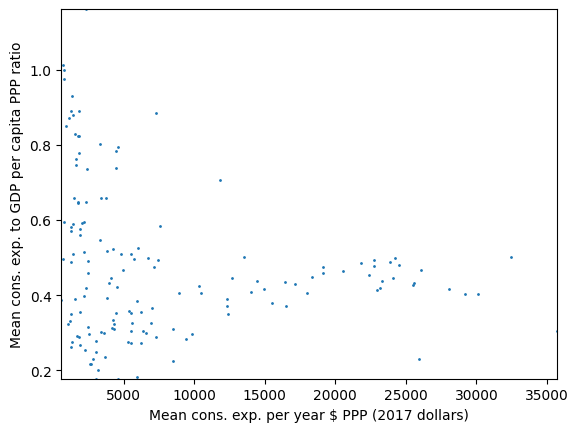

In [24]:
# calculate mean to gdp_pc_ppp ratio and plot as a scatter plot agasint the mean of the data dataframe
# calculate the mean to gdp_pc_ppp ratio
data['mean_to_gdp_pc_ppp_ratio'] = data['mean']*365/data['gdp_pc_ppp_2017']
# plot the mean_to_gdp_pc_ppp_ratio against the mean
plt.scatter(data['mean']*365, data['mean_to_gdp_pc_ppp_ratio'], s=1) # mean is multiplied by 365 to convert from mean per day to mean per year
plt.xlabel('Mean cons. exp. per year $ PPP (2017 dollars)')
plt.ylabel('Mean cons. exp. to GDP per capita PPP ratio')
plt.margins(0)
plt.show()

## Fit a model to this data which looks a potential energy function from physics e.g. Morse or lennard-jones potential
## But this is diffcult so we just fit a linear trend from 0 to 6000 and from 6000 to 3500

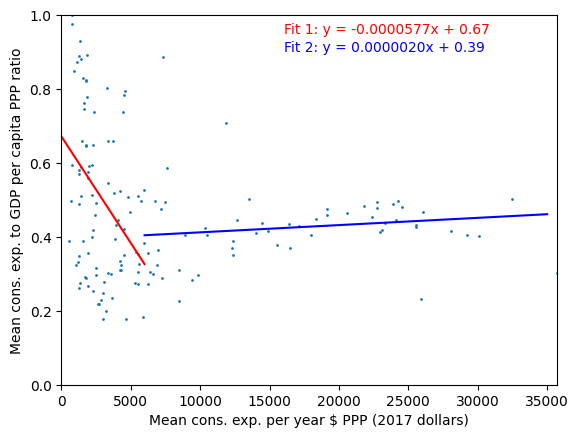

In [25]:
def linear_fit(data, x_col, y_col):
    return np.poly1d(np.polyfit(data[x_col], data[y_col], 1))

def quadratic_fit(data, x_col, y_col):
    return np.poly1d(np.polyfit(data[x_col], data[y_col], 2))

def power_law(x, a, b):
    return a * np.power(x, b)

def fit_and_plot(data, x_col, y_col):
    # Linear fits in specified ranges
    ranges = [(0, 6000), (6000, 35000)]
    linear_fits = []
    plot_colors = ['red', 'blue']  # Different color for each fit for clarity
    annotations = []

    for i, (start, end) in enumerate(ranges):
        mask = (data[x_col] >= start) & (data[x_col] <= end)
        fit = linear_fit(data[mask], x_col, y_col)
        linear_fits.append(fit)
        x_vals = np.linspace(start, end, 100)  # Use linspace for smooth line plotting
        plt.plot(x_vals, fit(x_vals), color=plot_colors[i])
        
        # Prepare annotation text for linear fit equations
        equation_text = f'Fit {i+1}: y = {fit[1]:.7f}x + {fit[0]:.2f}'
        annotations.append(equation_text)

    # Plotting annotations in the upper right corner, one above each other
    for i, text in enumerate(annotations):
        plt.annotate(text, xy=(0.45, 0.95 - i*0.05), xycoords='axes fraction', color=plot_colors[i])

    plt.scatter(data[x_col], data[y_col], s=1)
    plt.xlabel('Mean cons. exp. per year $ PPP (2017 dollars)')
    plt.ylabel('Mean cons. exp. to GDP per capita PPP ratio')
    plt.margins(0)
    plt.ylim(0, 1)
    plt.show()

# Note: Before using 'fit_and_plot', ensure 'data' DataFrame is defined and contains
# the necessary columns ('mean', 'gdp_pc_ppp_2017', etc.) as per your data structure.

# Adding a temporary column
data['temp_mean_yearly'] = data['mean']*365

# Updated example usage
data['mean_to_gdp_pc_ppp_ratio'] = data['mean']*365/data['gdp_pc_ppp_2017']
fit_and_plot(data, 'temp_mean_yearly', 'mean_to_gdp_pc_ppp_ratio')

##### the outcome of the above plotting exercise is basically that it makes, when keeping things super simple, sense to let countries have their current ratios up to mean cons.exp per year of 10000 and then fix the ratio at 0.4 or slightly above (although this is a cross country analysis and it does not necessarily tell us anything about individual country trajectories)

# Now check whether there is a relationship between GDP and carbon intensity

There is likely no cross-country relationship but that does not mean there is no relationship for each country individually over time.
Does faster economic growth lead to faster or slower or unchanged carbon intensity reduction?

Text(0, 0.5, 'Carbon intensity (kg CO2 per 2017 dollars)')

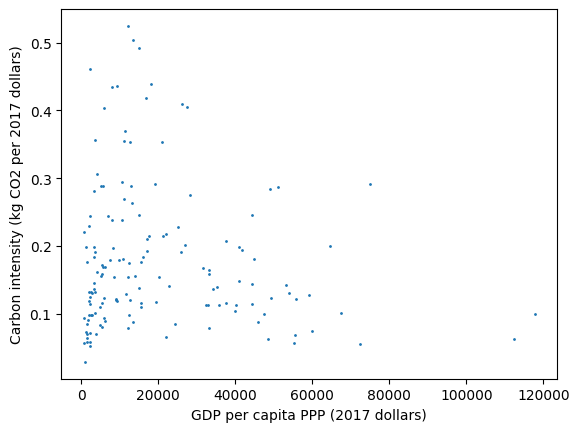

In [26]:
# plot on a scatterplot gdp_ppp_pc_2017 against carbon_intensity
plt.scatter(data['gdp_pc_ppp_2017'], data['carbon_intensity'], s=1)
plt.xlabel('GDP per capita PPP (2017 dollars)')
plt.ylabel('Carbon intensity (kg CO2 per 2017 dollars)')

## Check whether there is a relationship between economic growth and technology evolution i.e. carbon intensity reduction

ABW
AFE
AFG
AFW
AGO
ALB
AND
ARB
ARE
ARG
ARM
ASM
ATG
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BHR
BHS
BIH
BLR
BLZ
BMU
BOL
BRA
BRB
BRN
BTN
BWA
CAF
CAN
CEB
CHE
CHI
CHL
CHN
CIV
CMR
COD
COG
COL
COM
CPV
CRI
CSS
CUB
CUW
CYM
CYP
CZE
DEU
DJI
DMA
DNK
DOM
DZA
EAP
EAR
EAS
ECA
ECS
ECU
EGY
EMU
ERI
ESP
EST
ETH
EUU
FCS
FIN
FJI
FRA
FRO
FSM
GAB
GBR
GEO
GHA
GIB
GIN
GMB
GNB
GNQ
GRC
GRD
GRL
GTM
GUM
GUY
HIC
HKG
HND
HPC
HRV
HTI
HUN
IBD
IBT
IDA
IDB
IDN
IDX
IMN
IND
INX
IRL
IRN
IRQ
ISL
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KIR
KNA
KOR
KWT
LAC
LAO
LBN
LBR
LBY
LCA
LCN
LDC
LIC
LIE
LKA
LMC
LMY
LSO
LTE
LTU
LUX
LVA
MAC
MAF
MAR
MCO
MDA
MDG
MDV
MEA
MEX
MHL
MIC
MKD
MLI
MLT
MMR
MNA
MNE
MNG
MNP
MOZ
MRT
MUS
MWI
MYS
NAC
NAM
NCL
NER
NGA
NIC
NLD
NOR
NPL
NRU
NZL
OED
OMN
OSS
PAK
PAN
PER
PHL
PLW
PNG
POL
PRE
PRI
PRK
PRT
PRY
PSE
PSS
PST
PYF
QAT
ROU
RUS
RWA
SAS
SAU
SDN
SEN
SGP
SLB
SLE
SLV
SMR
SOM
SRB
SSA
SSD
SSF
SST
STP
SUR
SVK
SVN
SWE
SWZ
SXM
SYC
SYR
TCA
TCD
TEA
TEC
TGO
THA
TJK
TKM
TLA
TLS
TMN
TON
TSA
TSS
TTO
TUN
TUR
TUV
TZA
UGA
UKR
UMC


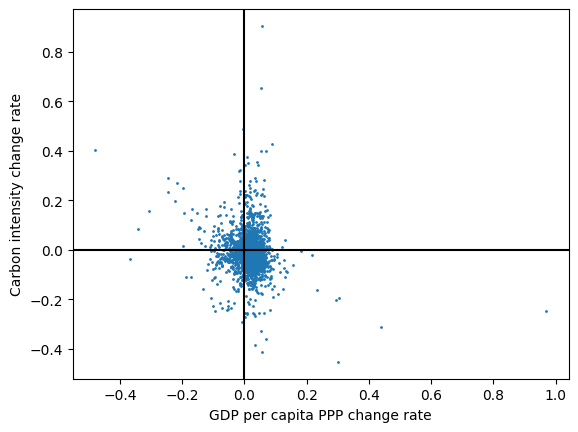

In [27]:
# import gdp_pc_ppp and carbon_intensity into numpy arrays then loop over all countries and compute for gdp per capita and carbon intensity the change rate from year to year from 2010 to 2020
# import gdp_pc_ppp and carbon_intensity from the csv data file which is not loaded yet into dataframes
# Importing the data
gdp_pc_ppp = pd.read_csv('./data/pip_all_data/gdp_pc_ppp.csv', sep=';')
carbon_intensity = pd.read_csv('./data/pip_all_data/carbon_intensity.csv')

# Assuming 'data' is another DataFrame that contains 'country_code'
# countries = data['country_code'].unique()
countries = gdp_pc_ppp['Country Code'].unique()  # Modify as per your actual DataFrame
years = list(np.arange(2010, 2021))

# Initialize an empty DataFrame for storing all change rates
all_change_rates_df = pd.DataFrame()

for country in countries:
    print(country)
    # Get the index for the current country in each DataFrame
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_ci = carbon_intensity[carbon_intensity['Country Code'] == country].index[0]

    # Extracting the values for each year
    gdp_pc_ppp_values = [gdp_pc_ppp.at[country_row_gdp, str(year)] for year in years]
    carbon_intensity_values = [carbon_intensity.at[country_row_ci, str(year)] for year in years]

    # Computing the change rate
    gdp_pc_ppp_change_rate = [(gdp_pc_ppp_values[i+1] - gdp_pc_ppp_values[i]) / gdp_pc_ppp_values[i] for i in range(len(years) - 1)]
    carbon_intensity_change_rate = [(carbon_intensity_values[i+1] - carbon_intensity_values[i]) / carbon_intensity_values[i] for i in range(len(years) - 1)]

    # Creating a dictionary for the change rates
    change_rate_dict = {
        'country_code': country,
        'gdp_pc_ppp_change_rate': gdp_pc_ppp_change_rate,
        'carbon_intensity_change_rate': carbon_intensity_change_rate
    }

    # Convert the dictionary to a DataFrame
    change_rate_df = pd.DataFrame(change_rate_dict)

    # Append this DataFrame to the cumulative DataFrame
    all_change_rates_df = pd.concat([all_change_rates_df, change_rate_df], ignore_index=True)

# The final DataFrame contains all the change rates for each country
print(all_change_rates_df)


# save this dataframe as a csv file
all_change_rates_df.to_csv('./data/pip_all_data/all_change_rates.csv', index=False)

# plot on a scatterplot gdp change rate against carbon intensity change rate
plt.scatter(all_change_rates_df['gdp_pc_ppp_change_rate'], all_change_rates_df['carbon_intensity_change_rate'], s=1)
plt.xlabel('GDP per capita PPP change rate')
plt.ylabel('Carbon intensity change rate')
# add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
# add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-')

ABW
AFE
AFG
AFW
AGO
ALB
AND
ARB
ARE
ARG
ARM
ASM
ATG
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BHR
BHS
BIH
BLR
BLZ
BMU
BOL
BRA
BRB
BRN
BTN
BWA
CAF
CAN
CEB
CHE
CHI
CHL
CHN
CIV
CMR
COD
COG
COL
COM
CPV
CRI
CSS
CUB
CUW
CYM
CYP
CZE
DEU
DJI
DMA
DNK
DOM
DZA
EAP
EAR
EAS
ECA
ECS
ECU
EGY
EMU
ERI
ESP
EST
ETH
EUU
FCS
FIN
FJI
FRA
FRO
FSM
GAB
GBR
GEO
GHA
GIB
GIN
GMB
GNB
GNQ
GRC
GRD
GRL
GTM
GUM
GUY
HIC
HKG
HND
HPC
HRV
HTI
HUN
IBD
IBT
IDA
IDB
IDN
IDX
IMN
IND
INX
IRL
IRN
IRQ
ISL
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KIR
KNA
KOR
KWT
LAC
LAO
LBN
LBR
LBY
LCA
LCN
LDC
LIC
LIE
LKA
LMC
LMY
LSO
LTE
LTU
LUX
LVA
MAC
MAF
MAR
MCO
MDA
MDG
MDV
MEA
MEX
MHL
MIC
MKD
MLI
MLT
MMR
MNA
MNE
MNG
MNP
MOZ
MRT
MUS
MWI
MYS
NAC
NAM
NCL
NER
NGA
NIC
NLD
NOR
NPL
NRU
NZL
OED
OMN
OSS
PAK
PAN
PER
PHL
PLW
PNG
POL
PRE
PRI
PRK
PRT
PRY
PSE
PSS
PST
PYF
QAT
ROU
RUS
RWA
SAS
SAU
SDN
SEN
SGP
SLB
SLE
SLV
SMR
SOM
SRB
SSA
SSD
SSF
SST
STP
SUR
SVK
SVN
SWE
SWZ
SXM
SYC
SYR
TCA
TCD
TEA
TEC
TGO
THA
TJK
TKM
TLA
TLS
TMN
TON
TSA
TSS
TTO
TUN
TUR
TUV
TZA
UGA
UKR
UMC


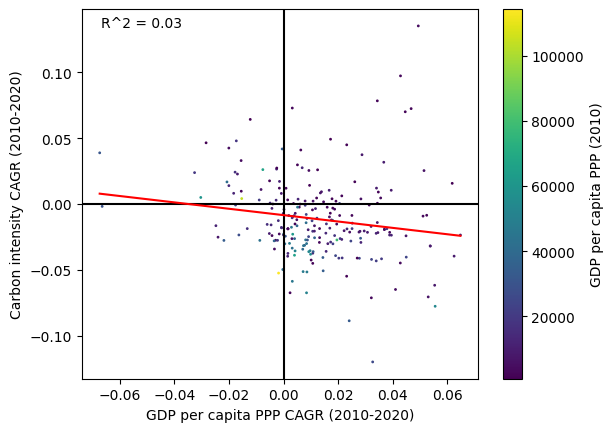

In [28]:
# Assuming 'data' is another DataFrame that contains 'country_code'
countries = gdp_pc_ppp['Country Code'].unique()  # Modify as per your actual DataFrame
years = list(np.arange(2010, 2021))

# Initialize an empty list for storing CAGR data
cagr_data = []

for country in countries:
    print(country)
    # Get the index for the current country in each DataFrame
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_ci = carbon_intensity[carbon_intensity['Country Code'] == country].index[0]

    # Extracting the values for the first and last year
    gdp_start = gdp_pc_ppp.at[country_row_gdp, str(years[0])]
    gdp_end = gdp_pc_ppp.at[country_row_gdp, str(years[-1])]
    ci_start = carbon_intensity.at[country_row_ci, str(years[0])]
    ci_end = carbon_intensity.at[country_row_ci, str(years[-1])]

    # Computing CAGR
    n_years = years[-1] - years[0]
    gdp_cagr = (gdp_end / gdp_start) ** (1/n_years) - 1
    ci_cagr = (ci_end / ci_start) ** (1/n_years) - 1

    # Appending the result to the list
    cagr_data.append({
        'country_code': country, 
        'gdp_pc_ppp_cagr': gdp_cagr, 
        'carbon_intensity_cagr': ci_cagr
    })

# Convert the list of dictionaries to a DataFrame
cagr_df = pd.DataFrame(cagr_data)

# Add GDP per capita PPP for 2010 to cagr_data
for item in cagr_data:
    country_code = item['country_code']
    country_row = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country_code].index[0]
    item['gdp_pc_ppp_2010'] = gdp_pc_ppp.at[country_row, '2010']  # Assuming '2010' is the column name

# Update cagr_df with the new data
cagr_df = pd.DataFrame(cagr_data)


# Save the CAGR DataFrame as a CSV file
cagr_df.to_csv('./data/pip_all_data/cagr.csv', index=False)

# Remove any rows with NaN or infinite values
cleaned_cagr_df = cagr_df.dropna().replace([np.inf, -np.inf], np.nan).dropna()

## Create a colormap for the scatter plot
norm = plt.Normalize(cleaned_cagr_df['gdp_pc_ppp_2010'].min(), cleaned_cagr_df['gdp_pc_ppp_2010'].max())
colors = cm.viridis(norm(cleaned_cagr_df['gdp_pc_ppp_2010']))

# Check if there are enough unique values to perform linear regression
if len(np.unique(cleaned_cagr_df['gdp_pc_ppp_cagr'])) > 1 and len(np.unique(cleaned_cagr_df['carbon_intensity_cagr'])) > 1:
    # Fit the linear model
    coefficients = np.polyfit(cleaned_cagr_df['gdp_pc_ppp_cagr'], cleaned_cagr_df['carbon_intensity_cagr'], 1)
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(cleaned_cagr_df['gdp_pc_ppp_cagr'].min(), cleaned_cagr_df['gdp_pc_ppp_cagr'].max(), 100)
    y_axis = polynomial(x_axis)

    # Plotting the CAGR values
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.scatter(cleaned_cagr_df['gdp_pc_ppp_cagr'], cleaned_cagr_df['carbon_intensity_cagr'], color=colors, s=1)
    ax.set_xlabel('GDP per capita PPP CAGR (2010-2020)')
    ax.set_ylabel('Carbon intensity CAGR (2010-2020)')
    ax.axhline(y=0, color='black', linestyle='-')
    ax.axvline(x=0, color='black', linestyle='-')
    # Add a linear fit line
    ax.plot(x_axis, y_axis, color='red')
    # Color countries based on their absolute GDP per capita PPP in 2010
    # Adding a colorbar for reference
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax, label='GDP per capita PPP (2010)')
    # plot the R^2 value
    r_squared = np.corrcoef(cleaned_cagr_df['gdp_pc_ppp_cagr'], cleaned_cagr_df['carbon_intensity_cagr'])[0][1] ** 2
    ax.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

    plt.show()
else:
    print("Insufficient variability in data for linear regression.")

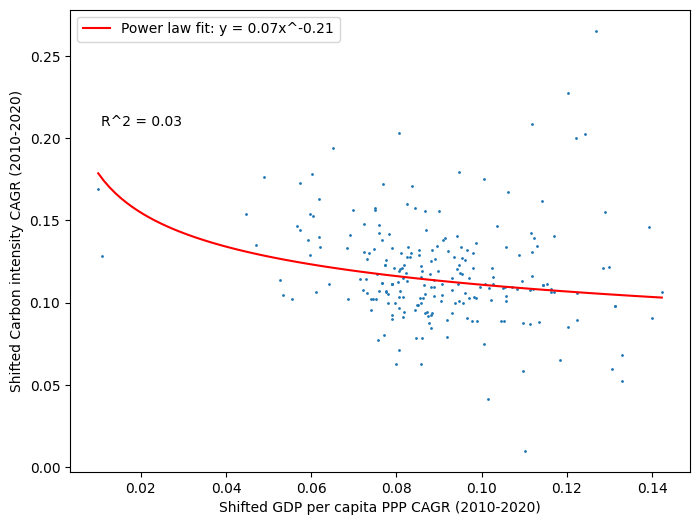

Elasticity of carbon intensity reduction with respect to GDP CAGR: -0.21


In [29]:
# Now fit a power law also

# ... [Your existing code ends here] ...

# Shift the data to make all values positive
min_gdp_cagr = np.abs(cleaned_cagr_df['gdp_pc_ppp_cagr'].min())
min_ci_cagr = np.abs(cleaned_cagr_df['carbon_intensity_cagr'].min())
cleaned_cagr_df['shifted_gdp_cagr'] = cleaned_cagr_df['gdp_pc_ppp_cagr'] + min_gdp_cagr + 0.01  # Avoid zero values
cleaned_cagr_df['shifted_ci_cagr'] = cleaned_cagr_df['carbon_intensity_cagr'] + min_ci_cagr + 0.01

# Log-transform the data
cleaned_cagr_df['log_gdp_cagr'] = np.log(cleaned_cagr_df['shifted_gdp_cagr'])
cleaned_cagr_df['log_ci_cagr'] = np.log(cleaned_cagr_df['shifted_ci_cagr'])

# Fit a linear model to the log-transformed data
coefficients, _ = np.polyfit(cleaned_cagr_df['log_gdp_cagr'], cleaned_cagr_df['log_ci_cagr'], 1, cov=True)

# The power law relationship: y = ax^b becomes linear when log-transformed: log(y) = log(a) + b*log(x)
a = np.exp(coefficients[1])  # Intercept is log(a), so a = exp(intercept)
b = coefficients[0]  # Slope is the exponent in the power law

# Create the power law function for plotting
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate x values for plotting the power law
x_values = np.linspace(cleaned_cagr_df['shifted_gdp_cagr'].min(), cleaned_cagr_df['shifted_gdp_cagr'].max(), 100)

# Plotting the power law model
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_cagr_df['shifted_gdp_cagr'], cleaned_cagr_df['shifted_ci_cagr'], s=1)
plt.plot(x_values, power_law(x_values, a, b), color='red', label=f'Power law fit: y = {a:.2f}x^{b:.2f}')
plt.xlabel('Shifted GDP per capita PPP CAGR (2010-2020)')
plt.ylabel('Shifted Carbon intensity CAGR (2010-2020)')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
# plot the R^2 value
plt.annotate(f'R^2 = {np.corrcoef(cleaned_cagr_df["shifted_gdp_cagr"], cleaned_cagr_df["shifted_ci_cagr"])[0][1]**2:.2f}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.show()

# Print the elasticity (exponent b in the power law)
print(f"Elasticity of carbon intensity reduction with respect to GDP CAGR: {b:.2f}")

### Replicate logarithmic model of gdp pc determining carbon intensity trend 2010 to 2020 from graph made

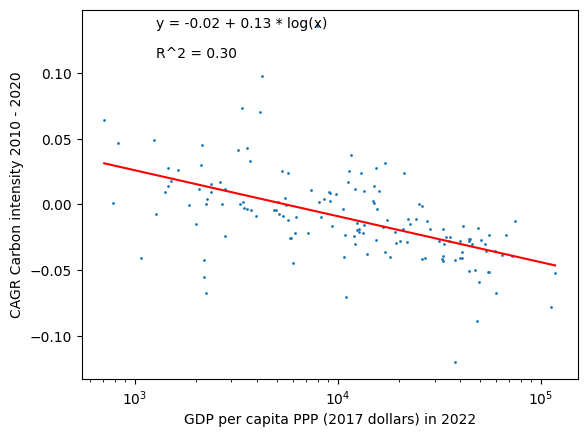

In [56]:
# plot from the dataframe data_nowcasted.extended.csv the column gdp_pc_ppp_2017 against the column carbon_intensity_trend
plt.scatter(data['gdp_pc_ppp_2017'], data['carbon_intensity_trend'], s=1)
# label the axes
plt.xlabel('GDP per capita PPP (2017 dollars) in 2022')
plt.ylabel('CAGR Carbon intensity 2010 - 2020')
# plot a logarithmic fit line
coefficients = np.polyfit(np.log(data['gdp_pc_ppp_2017']), data['carbon_intensity_trend'], 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(np.log(data['gdp_pc_ppp_2017']).min(), np.log(data['gdp_pc_ppp_2017']).max(), 100)
y_axis = polynomial(x_axis)
plt.plot(np.exp(x_axis), y_axis, color='red')
# also plot the R^2 value
r_squared = np.corrcoef(np.log(data['gdp_pc_ppp_2017']), data['carbon_intensity_trend'])[0][1] ** 2
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(0.15, 0.87), xycoords='axes fraction')
# and the equation of the logarithmic fit line
plt.annotate(f'y = {polynomial[1]:.2f} + {polynomial[0]:.2f} * log(x)', xy=(0.15, 0.95), xycoords='axes fraction')
# log scale the x axis
plt.xscale('log')
plt.show()

### another pattern we have to investigate is population growth as a function of gdp per capita
##### Murphy, Thomas W, Jr shows in https://escholarship.org/uc/item/9js5291m that net pop growth rate, without migration, negatively correlates with gdp per capita. replicate this and ascertain an elasticity

Country SSD has NaN values for one or both variables.
 
-0.008261 x + 0.08736
Elasticity of birth rate with respect to GDP per capita PPP: -0.25


C:\Users\yoswald\AppData\Local\Temp\ipykernel_8300\1739021735.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


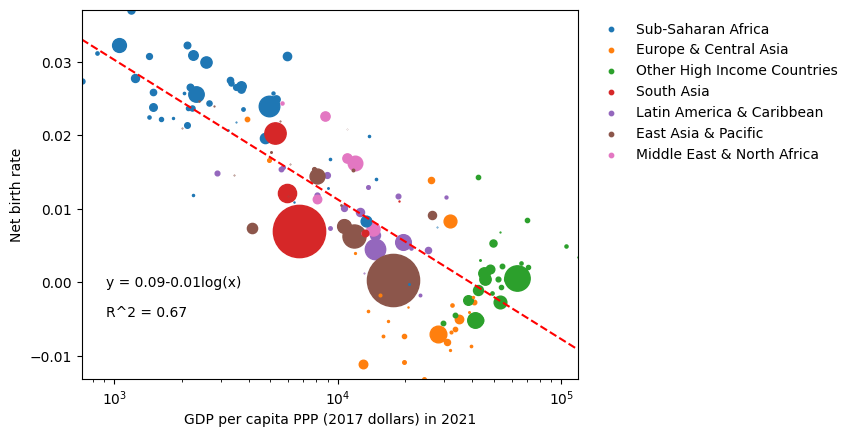

In [67]:
# import the csv file birth_and_death_rate.csv into a pandas dataframe
birth_and_death_rate = pd.read_csv('./data/pip_all_data/birth_and_death_rate.csv', sep=';')
# only use the country codes that are in the dataframe data_nowcasted_extended in the column country_code by make a list of the unique values in the column country_code
countries = data['country_code'].unique()
# make a list for the x and y values so we can fit a line later on
list_values_gdp = []
list_values_net = []
# create mapping between region and color based on regions in data dataframe so in the column region_name
region_color_mapping = {region: color for region, color in zip(data['region_name'].unique(), cm.tab10.colors)}
# make a set to keep track of which regions have appeared already in an earlier loop iteration
regions_appeared = set()
# define plot and axis on which all the scatter plots will be plotted
fig, ax = plt.subplots()
# loop over all countries
for country in countries:
    # Get the index for the current country in each DataFrame
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_bd = birth_and_death_rate[birth_and_death_rate['Country Code'] == country].index[0]
    #print(country_row_gdp, country_row_bd)

    # only plot for 2021
    gdp_pc_ppp_values = gdp_pc_ppp.at[country_row_gdp, '2021']
    net_values = birth_and_death_rate.at[country_row_bd, 'net']
    # check whether the values are not NaN
    if np.isnan(gdp_pc_ppp_values) or np.isnan(net_values):
        print(f"Country {country} has NaN values for one or both variables.")
        continue # The continue statement skips the current iteration of the loop and the control flow of the program goes to the next iteration.

    # find region of the country in the data dataframe
    region = data[data['country_code'] == country]['region_name'].values[0]
    
    # keep track of which region has appeared already in an earlier loop iteration with a set
    if region in regions_appeared:
        label = None
    else:
        label = region
        regions_appeared.add(region)

    size = data[data['country_code'] == country]['population'].values[0] / 1e6  # Population size in millions
    # Plot the data and set color according to region in data dataframe and determine size of the points according to population size in the dataframe data column population
    ax.scatter(gdp_pc_ppp_values, net_values, s=size, color=region_color_mapping[region], label=label)

    # label the axes
    ax.set_xlabel('GDP per capita PPP (2017 dollars) in 2021')
    ax.set_ylabel('Net birth rate')
    # log the x axis
    ax.set_xscale('log')
    # no margins
    ax.margins(0)

    # save all the countries in a list for x and y values so we can plot a fit line later on outside the loop together with the country code as a tuple
    list_values_gdp.append(gdp_pc_ppp_values)
    list_values_net.append(net_values)




if len(list_values_gdp) > 1:  # Ensure there's more than one data point
    try:
        # Your existing code for fitting and plotting...
        # fit a semi logarithmic fit line to the data
        coefficients = np.polyfit(np.log(list_values_gdp), list_values_net, 1)
        polynomial = np.poly1d(coefficients)
        print(polynomial)
        x_axis = np.linspace(np.log(min(list_values_gdp)), np.log(max(list_values_gdp)), 100)
        y_axis = polynomial(x_axis)
        # plot the fit line
        ax.plot(np.exp(x_axis), y_axis, color='red', linestyle='--')
        # also plot the R^2 value
        r_squared = np.corrcoef(np.log(list_values_gdp), list_values_net)[0][1] ** 2
        ax.annotate(f'R^{2} = {r_squared:.2f}', xy=(0.05, 0.17), xycoords='axes fraction')
        # and the equation of the logarithmic fit line
        ax.annotate(f'y = {polynomial[0]:.2f}{polynomial[1]:.2f}log(x)', xy=(0.05, 0.25), xycoords='axes fraction')
        # plot legend outside the plot to the upper right from it with no frame
        lgnd = ax.legend(loc='upper right', bbox_to_anchor=(1.55, 1), frameon=False)
        # Set a fixed marker size for all legend markers
        for handle in lgnd.legendHandles:
            handle.set_sizes([10])  # Adjust the number inside the list to change the size


    except np.linalg.LinAlgError:
        print("Error: SVD did not converge. Check your data for issues.")
else:
    print("Insufficient valid data points for fitting.")
    

# compute an elasticity of birth rate with respect to GDP per capita PPP
# Shift the data to make all values positive
min_net = np.abs(min(list_values_net))
# Avoid zero values
shifted_net = np.array(list_values_net) + min_net + 0.01
# now compute the elasticity via log log regression, the coefficient is the elasticity
coefficients = np.polyfit(np.log(list_values_gdp), np.log(shifted_net), 1)
# Print the elasticity which is the coefficient multiplication factor of the log log regression
print(f"Elasticity of birth rate with respect to GDP per capita PPP: {coefficients[0]:.2f}")

